# Machine Learning and Statistics Project

### **Neil Anglim**
***

# Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
iris = sns.load_dataset('iris')

---
# Introduction
---

This project embarks on an educational exploration into supervised learning and classification algorithms using the renowned Iris flower dataset associated with Ronald A Fisher. The primary goal is to comprehensively understand the fundamentals of supervised learning, delve into various classification algorithms, and implement them using the scikit-learn Python library.


---
# Project Brief
---

The objective of this notebook is to explore classification algorithms applied to the Iris flower dataset. It involves explaining the core concepts of supervised learning and classification algorithms, as well as the practical implementation of at least one common classification algorithm using scikit-learn. Throughout the notebook, emphasis will be placed on using appropriate plots, mathematical notations, and diagrams to explain the relevant concepts effectively.

---
# Introduction to Supervised Learning
---

## What is Supervised Learning?
Supervised learning is a branch of machine learning where algorithms learn from labeled training data. It involves training a model on input-output pairs, where the algorithm learns the mapping function from the input variables to the desired output variable, according to [IBM](https://www.ibm.com/topics/supervised-learning). The primary goal of supervised learning is to predict the output for new, unseen data based on patterns learned from the labeled dataset.

## Principles of Supervised Learning:
- Labeled Training Data: Supervised learning algorithms require labeled training data, where each data point is associated with a known output or target variable according to [Gillis](https://www.techtarget.com/searchenterpriseai/definition/supervised-learning), 2021.
- Learning from Examples: Algorithms learn patterns and relationships between input features and their corresponding labels through examples provided in the training data.
- Generalization: The learned patterns should generalize well to unseen data to make accurate predictions or classifications.

## Importance of Labeled Data in Training:
Labeled data forms the foundation of supervised learning. The availability of high-quality labeled datasets is crucial for training accurate and reliable predictive models. Some key aspects include:
### Training the Model: 
- Labeled data serves as a guide for the model during the learning process. It helps the algorithm understand the relationship between inputs and outputs.
### Model Evaluation:
- Labeled data facilitates the evaluation of the model's performance. The model predictions can be compared against the true labels to assess accuracy and determine the model's effectiveness.
### Iterative Improvement:
- With access to labeled data, models can be continuously refined and improved through iterations, leading to better performance and generalization.
### Challenges:
- Acquiring high-quality labeled data can be challenging and costly in some domains. Noisy or incorrect labels might negatively impact model performance.
---

## Cross-Validation in Supervised Learning:
Cross-validation is a vital technique in supervised learning used to assess a model's performance and generalizability. It involves partitioning the available labeled data into multiple subsets or folds, training the model on a portion of the data, and using the remaining data for validation. The primary aim of cross-validation is to estimate how well the model would perform on unseen data.

### K-Fold Cross-Validation:
One common method is k-fold cross-validation, where the dataset is divided into k equal-sized folds. The model is trained k times, if a specific value for k is given then it can be used to reference the model, "such as k=10 becoming 10-fold cross-validation" ([Brownlee](https://machinelearningmastery.com/k-fold-cross-validation/), 2018).  This process rotates until each fold has been used for validation once. The performance metrics obtained from each iteration are then averaged to provide a more robust estimate of the model's performance.

### Benefits of Cross-Validation:
- Provides a more reliable estimate of the model's performance compared to a single train-test split.
- Helps in detecting overfitting or underfitting issues by assessing the model's performance across different subsets of the data.
- Maximizes the use of available data for both training and validation ([Sharma](https://www.geeksforgeeks.org/cross-validation-machine-learning/), 2017).

### Application in Model Evaluation:
In the context of this project, employing cross-validation techniques will enable a more comprehensive assessment of classification algorithms' performance on predicting iris species. It allows for a better understanding of how well these algorithms generalize to new, unseen data points.

In the context of the Iris Dataset project, supervised learning techniques will be employed to classify the species of iris flowers based on their features. Exploring various classification algorithms will demonstrate how supervised learning is applied to this specific dataset.


---
# Understanding Supervised Learning
---

## Classification Algorithms vs Linear Regression

**Classification:**
- Objective : Assign categorical labels or classes to data.
  - Classification involves categorizing data into distinct classes or groups based on their features.
  - These algorithms are fundamental tools used in image recognition, spam detection, medical diagnosis, and various other applications.

**Regression:**
- Objective : Predict continuous numerical values.
  - Regression analysis involves predicting continuous outcomes based on relationships between variables.
  - Used when the goal is to estimate real-valued outputs (e.g., predicting prices, sales, temperatures).


## Classification Algorithms

- **k-Nearest Neighbors (k-NN):**
  - Determines a data point's class based on the majority class of its k nearest neighbors. 
  - This will be the subject of our subsequent implementation.
  
- **Decision [Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier):**
  - Uses hierarchical tree-like structures to split data based on feature thresholds.
  
- **Random Forests:**
  - Ensemble method utilizing multiple decision trees.

- **Support Vector Machines (SVM) with Kernels:**
  - Extends linear SVM using kernel functions for non-linear separation (from [scikitlearn](https://scikit-learn.org/stable/modules/svm.html#)).

- **Naive Bayes:**
  - Based on Bayes' theorem, assumes feature independence for classification [scikitlearn(naive bayes)](https://scikit-learn.org/stable/modules/naive_bayes.html).

- **Logistic Regression:**
  - A linear model for binary classification using logistic/sigmoid functions.
  - Value of a dependent variable predicted based on the value of one or more independent(predictor) variables ([IBM](https://www.ibm.com/topics/logistic-regression)).
  - Common use cases : Fraud detection, disease prediction, churn prediction. ([IBM](https://www.ibm.com/topics/logistic-regression#:~:text=the%20next%20step-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables.))
  
- **Support Vector Machines (SVM):**
- SVM are a special case, as they can be used in **classification** and **regression**, according to this [blog](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/#h-implementation-and-hyperparameter-tuning-of-support-vector-machine-in-python).
  - Identifies optimal hyperplanes or decision boundaries to separate data points of different classes in a high-dimensional space ([scikitlearn](https://scikit-learn.org/stable/modules/svm.html#)).
  - Particularly effective for linearly separable datasets, where classes can be distinctly divided by a straight line or hyperplane.
  - Common use cases : Image recognition, text classification, bioinformatics. ([IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=models-about-svm))

## Regression Techniques/Algorithms

- **Linear Regression: [IBM](https://www.ibm.com/topics/linear-regression#:~:text=Linear%20regression%20can%20be%20applied,and%20reliably%20predict%20the%20future.)**
  - Predicts a continuous outcome variable based on a linear relationship between one or more predictor variables and the target variable.
  - Used for estimating real-valued outputs (e.g., predicting prices, sales, temperatures).
  - Focuses on modeling the relationship between variables to understand the average change in the dependent variable concerning changes in the independent variable(s).

- **Polynomial Regression:**
  - Extends linear regression by fitting a polynomial equation to the data, allowing the model to capture more complex relationships.
  - Useful when the relationship between variables seems nonlinear.

- **Decision [Trees](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py) for Regression:**
  - Hierarchical tree-like structures used to predict continuous values by splitting data based on feature thresholds.
  - Provides a clear representation of the relationship between input variables and target values.

- **Support Vector Regression (SVR):**
  - Regression technique that uses Support Vector Machines to approximate continuous functions.
  - Identifies the optimal hyperplane to predict values within an acceptable error threshold.

- **Random Forest Regression:**
  - An ensemble method that utilizes multiple decision trees for regression.
  - Each tree contributes to the final prediction, reducing overfitting and improving accuracy.

- **Neural Network Regression:**
  - Utilizes neural network architectures to model complex relationships between input variables and continuous output values.
  - Suitable for handling large datasets and capturing intricate patterns.


---
# Exploring the Iris Dataset
---

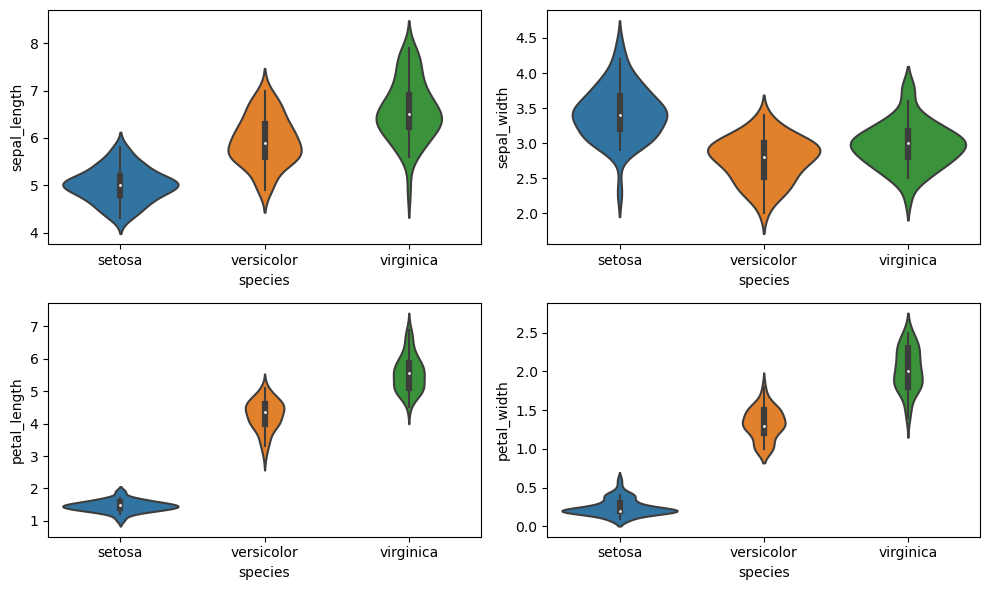

In [2]:
# Using seaborn to create violin plots for each feature across different species
plt.figure(figsize=(10, 6))

# violin plot for Sepal Length
plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='sepal_length', data=iris)

# violin plot for Sepal Width
plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='sepal_width', data=iris)

# violin plot for Petal Length
plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='petal_length', data=iris)

# violin plot for Petal Width
plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='petal_width', data=iris)

plt.tight_layout()

## Understanding Violin Plots

This was adapted using information from this [blog](https://mode.com/blog/violin-plot-examples) post, and my own reading on the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

Violin plots are a versatile data visualization tool that combines aspects of box plots and kernel density estimation (KDE) plots:

1. **Kernel Density Estimation (KDE):**
   - Represents the probability density of data along the y-axis using a smoothed curve, this is represented as the wider points in a violin plot. 
   - Wider sections indicate higher data density, showing where the data is more concentrated.

2. **Box Plot Elements:**
   - Median (white dot), interquartile range (IQR - thick black line), and whiskers for data range, excluding outliers.
   - Outliers are depicted as individual points beyond the whiskers.

## Interpretation:
- **Visualizing Distribution:**
  - Offers a clear view of data distribution, indicating central tendency, spread, and multimodal nature.

- **Comparison Between Groups:**
  - Enables easy comparison between different groups (e.g., species in the Iris dataset).
  - Differences in violin shapes imply variations in feature values among groups.

## Usefulness:
- **Comparing Multiple Distributions:**
  - Useful for simultaneous comparison of distributions or categories, aiding in understanding variability and differences across groups.

## Application to Iris Dataset:

In the context of the Iris dataset, violin plots help visualize and compare feature distributions (sepal length, sepal width, petal length, petal width) among different species (setosa, versicolor, virginica). They highlight variations in these features across Iris species, aiding in understanding their differences.

Violin plots offer a comprehensive visualization of data distributions, aiding in comparative analysis between groups and providing insights into the variability and spread of features across different categories.

---
# The chosen Learning Algorithms
---

## k-Nearest Neighbors (k-NN)

The k-Nearest Neighbors algorithm, often referred to as k-NN or KNN, is a straightforward yet powerful classification algorithm used for both simple and complex tasks. Its principle is based on the idea that data points with similar points can be found near each other. More can be found on [IBM](https://www.ibm.com/topics/knn#K-Nearest+Neighbors+Algorithm).

The key concepts behind k-NN include:

- **Distance Metrics:** Euclidean distance is commonly used to measure the distance between data points in the feature space.

$
d(p, q) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}
$

> It is also possible to use others distance formulas, such as Manhattan, Minkowski, or Hamming, which are detailed further [here](https://www.ibm.com/topics/knn#K-Nearest+Neighbors+Algorithm).


- **Majority Voting:** Classification of a new instance is determined by majority voting among its k-nearest neighbors.
- **Hyperparameter k:** The value of k determines the number of neighbors considered for classification.

k-NN is intuitive, doesn't require explicit model training, is easy to implement, and is particularly effective for smaller datasets.

## Decision Trees (DT)

Decision Trees (DT) are versatile supervised learning algorithms used in both classification and [regression](https://scikit-learn.org/stable/modules/tree.html).

Its key concepts include: 

- **[Gini](https://towardsdatascience.com/gini-impurity-measure-dbd3878ead33#:~:text=Def%3A%20Gini%20Impurity%20tells%20us,lower%20the%20likelihood%20of%20misclassification.) Impurity:** Probability of misclassifying an observation.
- **Nodes and Branches:** Each node in the tree represents a feature attribute and a decision rule, where branches emanate from nodes based on whether a data point meets the specified condition, and point to a subsequent decision, or leaf.
- **Leaf Nodes:** Final output or predicted class.

DT are versatile and easy to comprehend, but might require techniques like pruning or ensemble methods to prevent overfitting.

---
# Implementation of the chosen algorithm using scikit-learn
---

In this project, the focus will primarily be on the implementation and exploration of the k-Nearest Neighbors algorithm using the scikit-learn library. This choice is based on its simplicity, interpretability, and suitability for the Iris dataset, where data points are relatively small and distinct classes are well-separated. There will also be a small implementation of a decision tree.

The subsequent sections will delve deeper into the practical implementation of k-NN on the Iris dataset, covering steps such as data preprocessing, hyperparameter tuning, and performance evaluation.

## Data Preprocessing

- Splitting the data into features `x` and the target variable `y`
- Splitting the data into training and test sets

In [3]:
x = iris.drop('species', axis=1) # features
y = iris['species'] # target variable

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Instantiate and train the kNN classifier

- Creating an instance of the k-NN classifier (KNeighborsClassifier) and defining the number of neighbors (n_neighbors) to consider during classification.
- Training the classifier using the training data (X_train and y_train) via the fit() method.

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)  # hyperparameter k=3

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Predict and Evaluate the model

- Using the trained k-NN model to make predictions on the test dataset `(X_test)`.
- Calculating the accuracy of the model's predictions compared to the actual observed values using `accuracy_score`.
- Displaying a classification report, which includes metrics like precision, recall, and F1-score, to assess the model's performance for each class.
- Visualizing the model's performance using a confusion matrix to show the number of correct and incorrect predictions.

In [5]:
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))

Accuracy: 1.000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Precision
- This is the ratio of correctly predicted observations to the total predicted observations, it indicates the accuracy of the positive predictions. Here it is in depth on [scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html).

### Recall
- [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) is the ratio of correctly predicted positive observations to the total observed positive observations. It measures the model's ability to identify all positive instances.

### F1-score
- The mean of the precision and recall, computed like so : `F1 = 2 * (precision * recall) / (precision + recall)`. 
- A score of 1 indicates a perfect balance between precision and recall for that species.

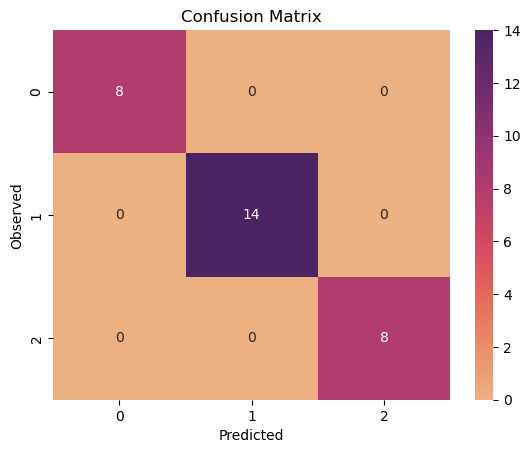

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="flare")
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Confusion Matrix')
plt.show()

In [7]:
conf_matrix

array([[ 8,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

This confusion matrix provides a clear picture of the model's performance in distinguishing between the three classes. It indicates areas where the model succeeded in making accurate predictions and where it might have made errors, particularly in distinguishing between Versicolor and Virginica.

## Decision Tree

The decision tree was chosen to be implemented later in the project to explore another simple classification algorithm. It is also easy to implement, like kNN, and can be trained very similarly.

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Splitting the data into features (X) and the target variable (y)
X_dt = iris.drop('species', axis=1)  # Features
y_dt = iris['species']  # Target variable

# Splitting the data into training and test sets
X_dttrain, X_dttest, y_dttrain, y_dttest = train_test_split(X_dt, y_dt, test_size=0.2)

# Creating an instance of the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

# Training the decision tree classifier using the training data
decision_tree.fit(X_dttrain, y_dttrain)

# Making predictions on the test data
y_dtpred = decision_tree.predict(X_dttest)

# Evaluating the model
accuracy = accuracy_score(y_dttest, y_dtpred)
print(f"Accuracy: {accuracy:.3f}")

# Displaying a classification report and confusion matrix
print(classification_report(y_dttest, y_dtpred))

Accuracy: 0.967
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.89      0.94         9
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



[Text(0.4, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [39, 41, 40]\nclass = Versicolor'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Setosa'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.5\nsamples = 81\nvalue = [0, 41, 40]\nclass = Versicolor'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.165\nsamples = 44\nvalue = [0, 40, 4]\nclass = Versicolor'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]\nclass = Versicolor'),
 Text(0.3, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = Virginica'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Virginica'),
 Text(0.4, 0.25, 'x[2] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Versicolor'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Versicolor'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virgi

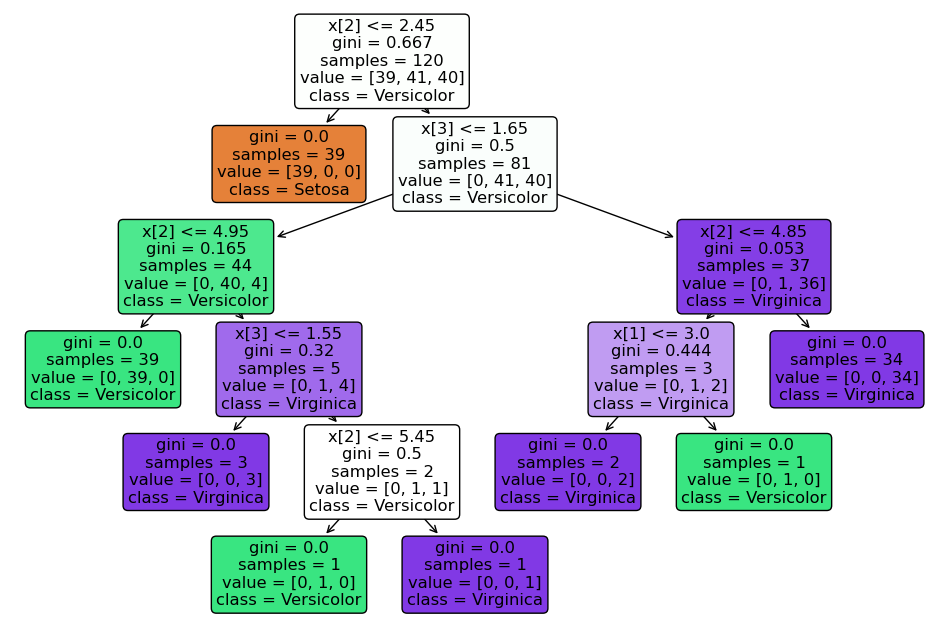

In [9]:
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'], feature_names=None)

After being trained a number of different times and rerun, in its most basic form, Decision Trees seem to lack the consistency that a kNN classifier maintains. This could be remedied by including several more decision trees and utilizing Random Forests. 

---
# Conclusion
---

In conclusion, this project initiates an educational journey into supervised learning and classification algorithms. It lays the groundwork by elucidating fundamental concepts of supervised learning, the significance of labeled data, cross-validation techniques, and an overview of classification algorithms.

The Iris flower dataset serves as a practical example to explore and understand these concepts better. Utilizing visualizations such as violin plots, the distributions of various features among different Iris species are highlighted, providing insights into their variations.

The practical implementation of the k-Nearest Neighbors (k-NN) algorithm on the Iris dataset showcased its effectiveness in accurately classifying Iris species based on their features. Achieving a perfect accuracy score of 1.00 across all classes in the test dataset underscored the algorithm's suitability for this specific dataset. The detailed evaluation metrics - precision, recall, and F1-score - provided deeper insights into the model's performance for each class. Decision trees seem to suffer without making use of pruning or setting maximum tree [depth](https://scikit-learn.org/stable/modules/tree.html).

Future explorations might delve into more complex datasets or explore advanced algorithms, expanding the understanding of machine learning techniques and their adaptability to diverse datasets and problem domains.

---
# References
---

Hyperlinks can be seen throughout this Jupyter Notebook, and these will provided increased understanding of the complex methods discussed during the project.

***
# End